In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [221]:
df = pkl.load(open('project8.pkl', 'rb'))
df.head()

,Unnamed: 0,post_id,self_text,user_is_verified,controversiality,ups,downs,subreddit,score,user_awardee_karma,user_awarder_karma,user_total_karma,user_comment_karma,user_link_karma,post_score,post_upvote_ratio,post_thumbs_up,post_total_awards_ratio,post_created_time
0,1979,9grgvl,"Yes, modeling anything with less resolution i...",True True True True True True True,0.142857,2.857143,0,climate_science,2.857143,8.571429,0.000000,11034.571429,10438.285714,587.714286,33,0.97,33,0,2018-09-18 03:59:40
1,503,1anritd,"Thing is, there's no official paper that desc...",True True True True True True True,0.000000,9.000000,0,climateskeptics,9.000000,748.142857,9.571429,91926.000000,42031.571429,49136.714286,67,0.94,67,0,2024-02-10 21:56:09
2,1387,16xyvqf,I read that article a month ago. Not sure wh...,True,0.000000,2.000000,0,climateskeptics,2.000000,315.000000,0.000000,37103.000000,36305.000000,483.000000,7,0.73,7,0,2023-10-02 14:58:12
3,918,18ii60q,&gt; Dr. Paul Pettré provides a damning critq...,True,0.000000,3.000000,0,climateskeptics,3.000000,1683.000000,20.000000,164653.000000,63989.000000,98961.000000,12,0.93,12,0,2023-12-14 20:42:33
4,1375,16zuc0a,This was a really good interview. She really ...,False,0.000000,3.000000,0,climateskeptics,3.000000,1703.000000,114.000000,1817.000000,0.000000,0.000000,27,0.97,27,0,2023-10-04 18:12:08


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2027 non-null   int64  
 1   post_id                  2027 non-null   object 
 2   self_text                2027 non-null   object 
 3   user_is_verified         2027 non-null   object 
 4   controversiality         2027 non-null   float64
 5   ups                      2027 non-null   float64
 6   downs                    2027 non-null   int64  
 7   subreddit                2027 non-null   object 
 8   score                    2027 non-null   float64
 9   user_awardee_karma       2022 non-null   float64
 10  user_awarder_karma       2022 non-null   float64
 11  user_total_karma         2022 non-null   float64
 12  user_comment_karma       2022 non-null   float64
 13  user_link_karma          2022 non-null   float64
 14  post_score              

### Task 1

In [244]:
df["preprocessed_text"] = df["self_text"].apply(lambda x: x.lower())
df["preprocessed_text"]

0        yes, modeling anything with less resolution i...
1        thing is, there's no official paper that desc...
2        i read that article a month ago.  not sure wh...
3        &gt; dr. paul pettré provides a damning critq...
4        this was a really good interview. she really ...
                              ...                        
2022     it’s also interesting seeing the people in th...
2023     based on current technologies and market tren...
2024     [this one?](https://www.aip.org/history-progr...
2025     j f'ing c...potholes are caused by wheel load...
2026     lackadick . is this why on climatechange the ...
Name: preprocessed_text, Length: 2027, dtype: object

In [224]:
stop_words = set(stopwords.words('english'))
df["tokenized_text"] = df["preprocessed_text"].apply(lambda x: word_tokenize(x))
df["tokenized_text"] = df["tokenized_text"].apply(lambda x: [word for word in x if word not in stop_words])
df["tokenized_text"] = df["tokenized_text"].apply(lambda x: [word for word in x if word.isalpha()])

In [225]:
#group by subreddit
grouped = df.groupby('subreddit')
df_cli_sci = grouped.get_group('climate_science')
df_cli_skp = grouped.get_group('climateskeptics')

print(df_cli_sci.shape)
print(df_cli_skp.shape)

(442, 21)
(1585, 21)


In [226]:
cli_sci_words = [word for words in df_cli_sci["tokenized_text"].values for word in words]
cli_skp_words = [word for words in df_cli_skp["tokenized_text"].values for word in words]

In [227]:
common_words = set(cli_sci_words).intersection(set(cli_skp_words)) #returns a set of common words
print(len(common_words))
print(common_words)

9708
{'inspire', 'delayed', 'protein', 'producer', 'impose', 'explicitly', 'inland', 'tropopause', 'soft', 'implement', 'atrocities', 'reaction', 'researchgate', 'embrace', 'four', 'sst', 'finland', 'confirming', 'mitigating', 'climate', 'acquisition', 'aerosol', 'general', 'goal', 'depends', 'subsidence', 'hottest', 'uninterested', 'examined', 'recruited', 'observable', 'rome', 'let', 'hysteria', 'healed', 'distances', 'types', 'calculating', 'squares', 'two', 'nasa', 'matching', 'refutation', 'head', 'insulative', 'opposite', 'begin', 'triangle', 'mechanism', 'intransigence', 'slide', 'guarantee', 'proud', 'behaving', 'ha', 'amounts', 'culprit', 'uah', 'comprised', 'paul', 'climatology', 'cessation', 'saw', 'isotopic', 'spray', 'leach', 'routes', 'coupled', 'tricked', 'moving', 'compute', 'diversity', 'involving', 'similar', 'sequester', 'mire', 'switch', 'ingenuity', 'coerce', 'organisms', 'swapped', 'originating', 'hadley', 'trusted', 'angle', 'conductive', 'ration', 'diffuse', 'po

In [228]:
#remove common words from each subreddit
cli_sci_words = [word for word in cli_sci_words if word not in common_words] 
cli_skp_words = [word for word in cli_skp_words if word not in common_words]

In [229]:
print(len(cli_sci_words))
print(len(cli_skp_words))

3761
42204


In [230]:
total_words = cli_sci_words + cli_skp_words
print(len(total_words))
print(len(set(total_words)))

45965
18597


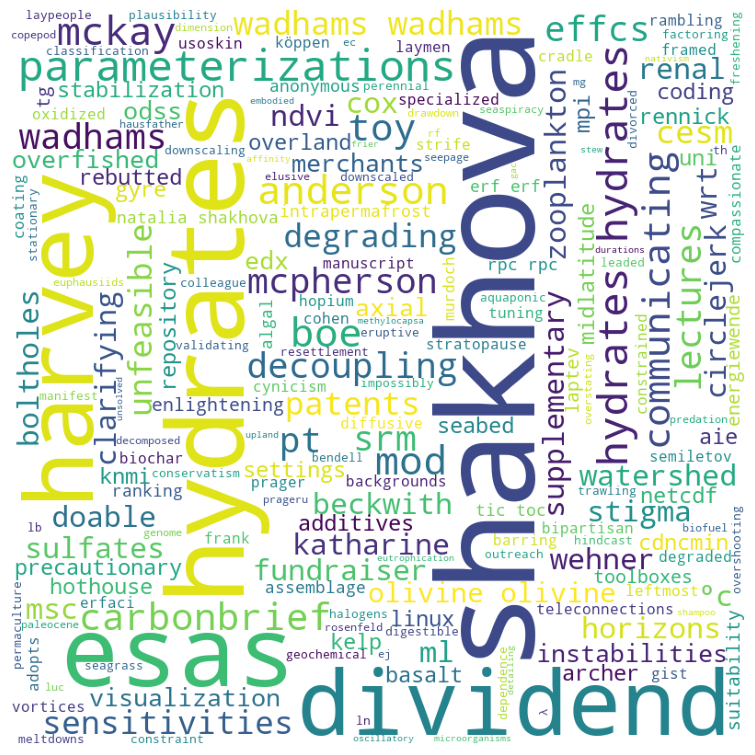

In [231]:
#word cloud for climate science
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(' '.join(cli_sci_words))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout()
plt.axis("off")
plt.show()

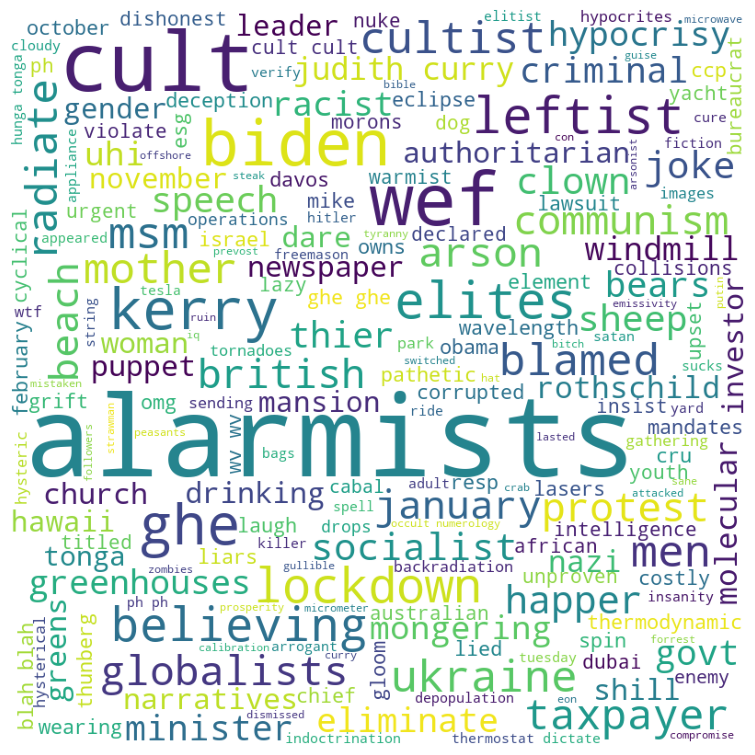

In [232]:
#word cloud for climate skeptics
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(' '.join(cli_skp_words))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout()
plt.axis("off")
plt.show()

### Task 2

In [234]:
#TF-IDF
combined_text = [df_cli_sci["preprocessed_text"].values, df_cli_skp["preprocessed_text"].values]
combined_text = np.concatenate(combined_text)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(combined_text)
print(tfidf_matrix.shape)



(2027, 36578)
